<a href="https://colab.research.google.com/github/subhashraj3031/AlmaBetter_Project/blob/main/Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer_Purchase_Behavior_Analysis**

# **Project Type** - Exploratory Data Analysis (EDA) and Descriptive Statistical Analysis

# **Contribution** - Individual

# **Team Member** - **1**

# **Project Summary:**
This project focuses on analyzing customer purchase behavior using descriptive statistics and probability concepts. The dataset contains demographic information, purchasing history, and campaign response data collected during a previous marketing campaign. The analysis aims to uncover patterns, trends, and relationships among customer characteristics and their spending behavior. By applying statistical measures such as central tendency, dispersion, and probability distributions, the project provides data-driven insights that can help improve marketing strategies and increase campaign effectiveness.

# **Project Overview:**
The objective of this project is to explore and understand customer behavior through statistical analysis of a real-world marketing dataset. The project begins with data cleaning and preprocessing to handle missing values and ensure data consistency. Descriptive statistics are then used to summarize key customer attributes such as age, income, and product spending.

Further analysis identifies suitable probability distributions for important variables like campaign response and purchase counts. Relationships between customer demographics, spending habits, and offer acceptance are examined to segment customers into meaningful groups. Finally, visualizations are used to communicate insights clearly, and actionable recommendations are provided to help the company optimize marketing efforts and improve customer engagement.



##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





# **Importing Required Libraries.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Loading Dataset**

In [ ]:
## Loadning dataset
df = pd.read_excel('/content/Superstore Marketing Data.xlsx')

In [ ]:
df.head(2)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0


##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Handle Missing Values (Income)

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].median())
print(df['Income'])

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64


# Convert Date Column

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
print(df['Dt_Customer'])

0      2014-06-16
1      2014-06-15
2      2014-05-13
3             NaT
4             NaT
          ...    
2235          NaT
2236   2013-01-22
2237          NaT
2238   2012-11-29
2239          NaT
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]


# Create Age Column

In [ ]:
df['Age'] = 2024 - df['Year_Birth']

print(df['Age'])

0       54
1       63
2       66
3       57
4       35
        ..
2235    48
2236    47
2237    48
2238    46
2239    55
Name: Age, Length: 2240, dtype: int64


# Basic Descriptive Statistics

In [ ]:
df.describe()


,Id,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,1324,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,2013-07-19 09:00:32.628398848,49.109375,303.935714,26.302232,166.950000,...,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375,55.194196
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-26 00:00:00,24.000000,23.750000,1.000000,16.000000,...,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,47.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-21 12:00:00,49.000000,173.500000,8.000000,67.000000,...,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,54.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2014-01-15 00:00:00,74.000000,504.250000,33.000000,232.000000,...,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,65.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,131.000000
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391,11.984069


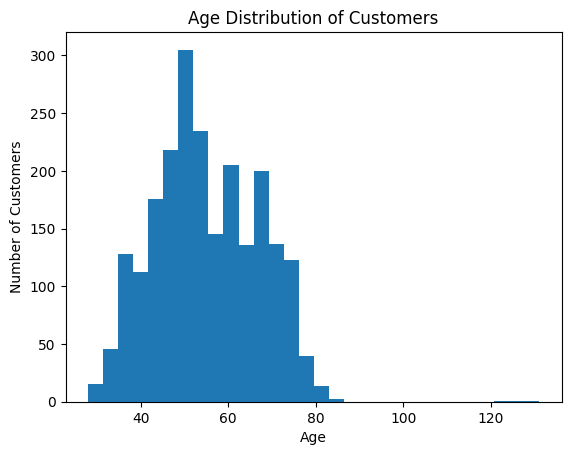

In [ ]:
# Customer Demographics Analysis
# Age Distribution

plt.figure()
plt.hist(df['Age'], bins=30)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Age Distribution of Customers")
plt.show()



In [ ]:
# Education Distribution
df['Education'].value_counts()


,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
# Marital Status Distribution
df['Marital_Status'].value_counts()


,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
YOLO,2
Absurd,2


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [ ]:
# Select Key Variables
key_vars = [
    'Age',
    'Income',
    'MntWines',
    'MntMeatProducts',
    'NumWebPurchases'
]


In [ ]:
# Measures of Central Tendency

central_tendency = pd.DataFrame({
    'Mean': df[key_vars].mean(),
    'Median': df[key_vars].median(),
    'Mode': df[key_vars].mode().iloc[0]
})

central_tendency


,Mean,Median,Mode
Age,55.194196,54.0,48.0
Income,52237.975446,51381.5,51381.5
MntWines,303.935714,173.5,2.0
MntMeatProducts,166.950000,67.0,7.0
NumWebPurchases,4.084821,4.0,2.0


In [ ]:
# Central Tendency & Dispersion
df[['Income','Age','MntWines','MntMeatProducts']].agg(['mean','median','std'])


,Income,Age,MntWines,MntMeatProducts
mean,52237.975446,55.194196,303.935714,166.950000
median,51381.500000,54.000000,173.500000,67.000000
std,25037.955891,11.984069,336.597393,225.715373


In [ ]:
# Outlier Detection (IQR Method)

Q1 = df[key_vars].quantile(0.25)
Q3 = df[key_vars].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[key_vars] < (Q1 - 1.5 * IQR)) |
            (df[key_vars] > (Q3 + 1.5 * IQR)))

outliers.sum()



,0
Age,3
Income,8
MntWines,35
MntMeatProducts,175
NumWebPurchases,4


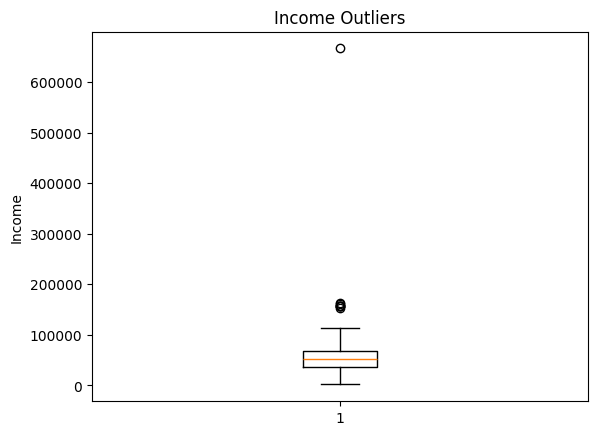

In [ ]:
# Outlier Detection (Boxplot)

plt.figure()
plt.boxplot(df['Income'])
plt.title("Income Outliers")
plt.ylabel("Income")
plt.show()


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

In [ ]:
# Binomial Distribution (Campaign Response)
df['Response'].value_counts(normalize=True)


,proportion
Response,
0,0.850893
1,0.149107


In [ ]:
# Probability of offer acceptance
p_accept = df['Response'].mean()
p_accept


np.float64(0.14910714285714285)

In [ ]:
# Expected Number of Purchases
df['NumWebPurchases'].mean()


np.float64(4.084821428571429)

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

/tmp/ipython-input-3626448756.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


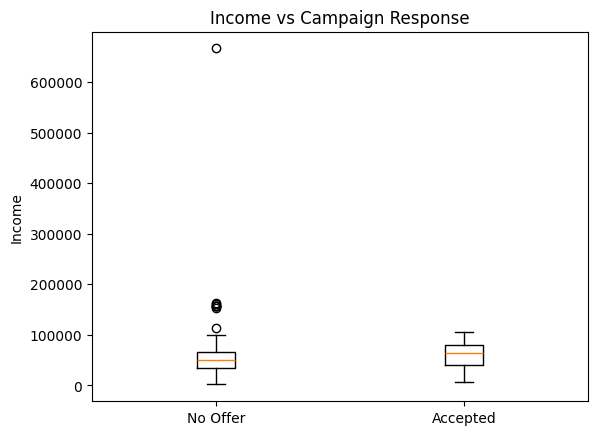

In [ ]:
# Income vs Campaign Response
plt.figure()
plt.boxplot([
    df[df['Response']==0]['Income'],
    df[df['Response']==1]['Income']
], labels=['No Offer', 'Accepted'])
plt.ylabel("Income")
plt.title("Income vs Campaign Response")
plt.show()


In [ ]:
# Spending Behavior Comparison
df.groupby('Response')[['MntWines','MntMeatProducts']].mean()


,MntWines,MntMeatProducts
Response,,
0,269.104407,144.624344
1,502.703593,294.353293


In [ ]:
# Customer Segmentation (Simple)
df['Total_Spending'] = (
    df['MntWines'] + df['MntMeatProducts'] +
    df['MntFruits'] + df['MntFishProducts'] +
    df['MntSweetProducts'] + df['MntGoldProds']
)

df[['Total_Spending','Income','Response']].head()


,Total_Spending,Income,Response
0,1190,84835.0,1
1,577,57091.0,1
2,251,67267.0,0
3,11,32474.0,0
4,91,21474.0,1


## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

In [ ]:
# Create Total Spending Feature
df['Total_Spending'] = (
    df['MntWines'] +
    df['MntMeatProducts'] +
    df['MntFruits'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)


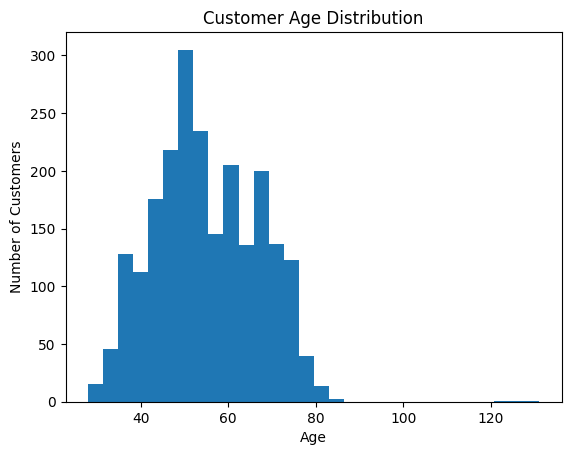

In [ ]:
# Customer Age Distribution
plt.figure()
plt.hist(df['Age'], bins=30)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Customer Age Distribution")
plt.show()


Insight:

Offer-accepting customers spend significantly more on:

Wine

Meat products

Gold products

Non-responders show much lower average spending

Conclusion:
High-spending customers are more responsive to marketing campaigns, especially in premium product categories.

/tmp/ipython-input-2600661183.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


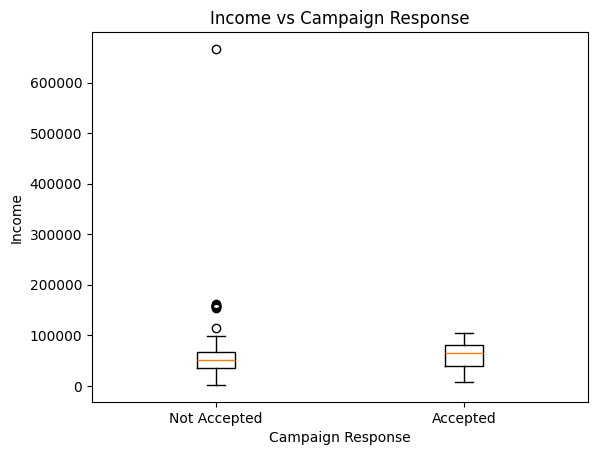

In [ ]:
# Income vs Campaign Response
plt.figure()
plt.boxplot(
    [df[df['Response'] == 0]['Income'],
     df[df['Response'] == 1]['Income']],
    labels=['Not Accepted', 'Accepted']
)
plt.xlabel("Campaign Response")
plt.ylabel("Income")
plt.title("Income vs Campaign Response")
plt.show()



Insight:

Customers who accepted the campaign offer have higher median income

Income distribution for responders is consistently above non-responders

Conclusion:
Higher-income customers are more likely to accept marketing offers.

<Figure size 640x480 with 0 Axes>

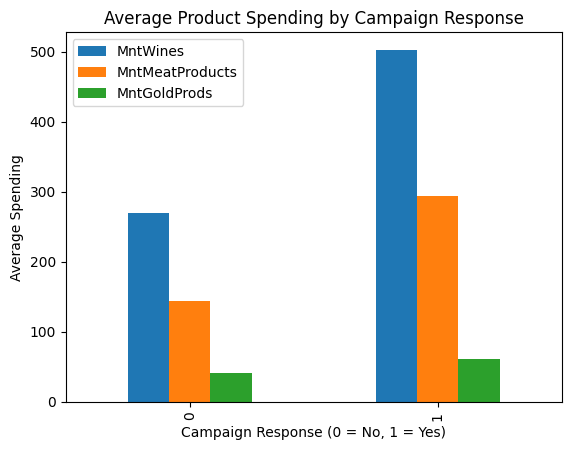

In [ ]:
# Product Spending by Campaign Response
avg_spending = df.groupby('Response')[[
    'MntWines',
    'MntMeatProducts',
    'MntGoldProds'
]].mean()

plt.figure()
avg_spending.plot(kind='bar')
plt.xlabel("Campaign Response (0 = No, 1 = Yes)")
plt.ylabel("Average Spending")
plt.title("Average Product Spending by Campaign Response")
plt.show()


Insight:

Offer-accepting customers spend significantly more on:

Wine

Meat products

Gold products

Non-responders show much lower average spending

Conclusion:
High-spending customers are more responsive to marketing campaigns, especially in premium product categories.

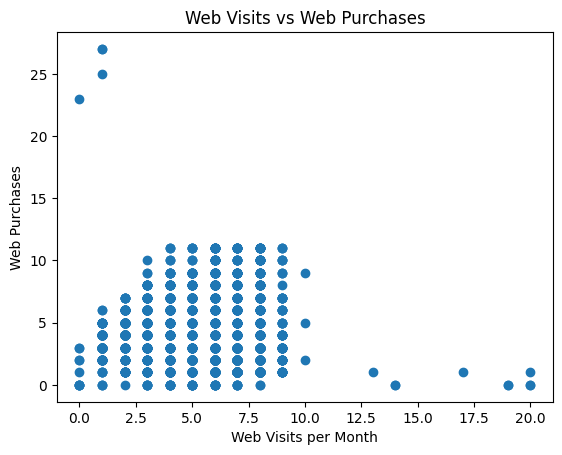

In [ ]:
# Web Visits vs Web Purchases

plt.figure()
plt.scatter(df['NumWebVisitsMonth'], df['NumWebPurchases'])
plt.xlabel("Web Visits per Month")
plt.ylabel("Web Purchases")
plt.title("Web Visits vs Web Purchases")
plt.show()


Insight:

Many customers visit the website frequently but make few purchases

High web visits do not necessarily translate into conversions

Conclusion:
There is a conversion gap between browsing and purchasing behavior

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍